# When will it be cheaper to book an accomodataion in Seattle?

When traveling to other city, one of the most important thing is to find a cheap and comfortable accomodation. So if we want to visit Seattle, when will it be cheaper to book an accomodataion? The aim of this notebook is to find the answer by exploring relationship between date and price using calendar data.

### Step 1: Check and handle the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Gathering the data

In [2]:
calendar = pd.read_csv('Seattle_Airbnb_Open_Data\calendar.csv')
print('The shape of calendar data:', calendar.shape)
calendar.head()

The shape of calendar data: (1393570, 4)


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [3]:
calendar.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [4]:
calendar.isnull().sum().sort_values()[::-1]

price         459028
available          0
date               0
listing_id         0
dtype: int64

#### Cleaning the data

There are some missing data in **price** column, it is beacause listing is unavailable at that time(the value of **available** is 'f'), so we just choose available data(where the value of **available** is 't').

In [5]:
data = calendar[calendar['available']=='t']
print(data.shape)
data.head()

(934542, 4)


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
9,241032,2016-01-13,t,$85.00
10,241032,2016-01-14,t,$85.00
14,241032,2016-01-18,t,$85.00


In [6]:
data.isnull().sum().sort_values()[::-1]

price         0
available     0
date          0
listing_id    0
dtype: int64

Now the type of **price** is string, we need to transform it into float

In [7]:
def price_trans(x):
    """
    Transform price data into float.
    
    INPUT:
        x - a string that descibes the price.
        
    OUTPUT:
        x - a float, value of the price.
    """
    
    if type(x) == str:
        x = x.replace('$', '')
        x = x.replace(',', '')
        x = float(x)
    return x

In [8]:
data['price'] = data['price'].map(lambda x: price_trans(x))
data.head()

C:\Users\zengh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
9,241032,2016-01-13,t,85.0
10,241032,2016-01-14,t,85.0
14,241032,2016-01-18,t,85.0


In [9]:
data['price'].dtype

dtype('float64')

### Step 2: How **price** changes with **date**

In [11]:
data['date'] = pd.to_datetime(data['date'])

C:\Users\zengh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [51]:
date_price = pd.DataFrame(data.groupby('date')['price'].sum(), )
date_price['avg'] = data.groupby('date')['price'].mean()
date_price.columns = ['total', 'avg']
date_price.head()

,total,avg
date,,
2016-01-04,211819.0,122.085879
2016-01-05,225312.0,120.681307
2016-01-06,220815.0,120.928258
2016-01-07,214823.0,120.958896
2016-01-08,227456.0,127.640853


#### Data visualization
Plot line chart about **date** and **avg** to see how average price changes with date

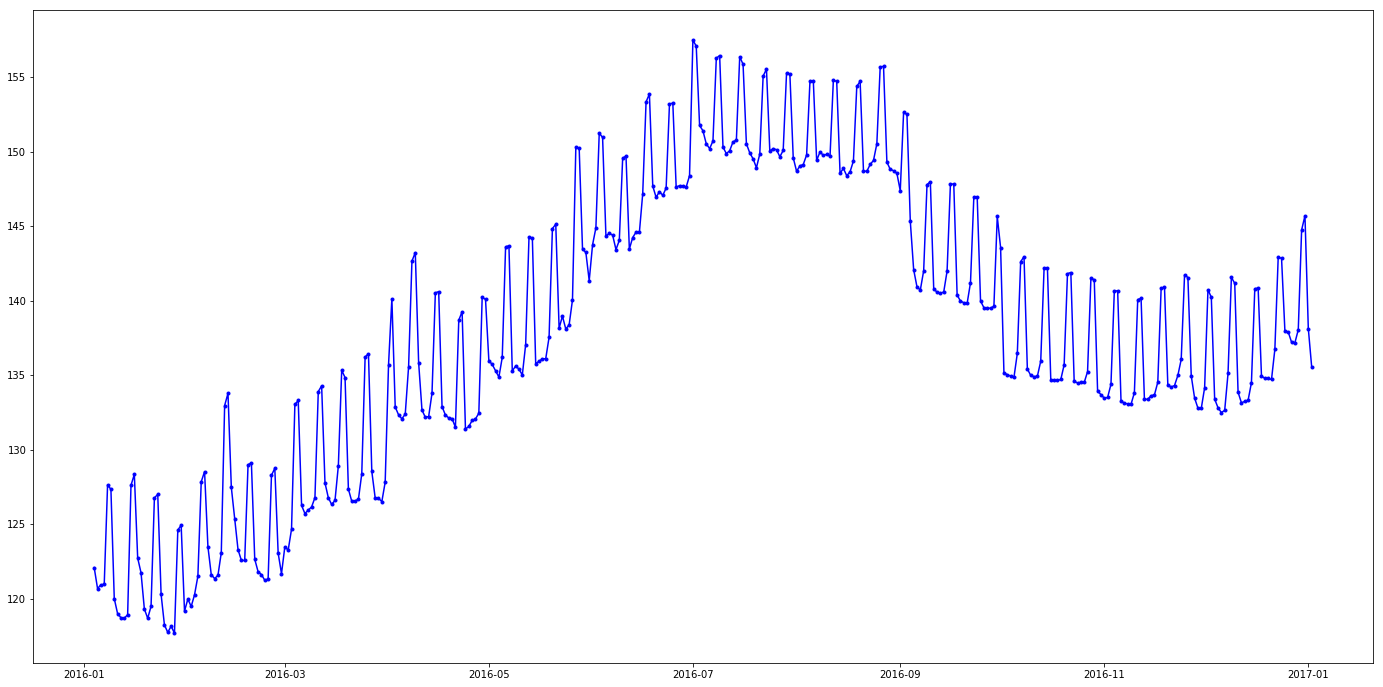

In [53]:
plt.figure(figsize=(24, 12))
plt.plot(date_price.index, date_price['avg'], color='b', linestyle='-', marker='.')

In general, we can see that the price is highest between july and september, and we can also find that The price fluctuates within a certain range.

In [60]:
data['year'] = data['date'].dt.year

C:\Users\zengh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [62]:
data['month'] = data['date'].dt.month

C:\Users\zengh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [65]:
data['day'] = data['date'].dt.day

C:\Users\zengh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [66]:
data.head()

,listing_id,date,available,price,year,month,day
0,241032,2016-01-04,t,85.0,2016,1,4
1,241032,2016-01-05,t,85.0,2016,1,5
9,241032,2016-01-13,t,85.0,2016,1,13
10,241032,2016-01-14,t,85.0,2016,1,14
14,241032,2016-01-18,t,85.0,2016,1,18


In [73]:
import datetime

data['day_of_week'] = data['date'].map(lambda x: x.weekday()+1)

C:\Users\zengh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [74]:
data.head()

,listing_id,date,available,price,year,month,day,day_of_week
0,241032,2016-01-04,t,85.0,2016,1,4,1
1,241032,2016-01-05,t,85.0,2016,1,5,2
9,241032,2016-01-13,t,85.0,2016,1,13,3
10,241032,2016-01-14,t,85.0,2016,1,14,4
14,241032,2016-01-18,t,85.0,2016,1,18,1


In [75]:
data = data.drop('available', axis=1)
data.head()

,listing_id,date,price,year,month,day,day_of_week
0,241032,2016-01-04,85.0,2016,1,4,1
1,241032,2016-01-05,85.0,2016,1,5,2
9,241032,2016-01-13,85.0,2016,1,13,3
10,241032,2016-01-14,85.0,2016,1,14,4
14,241032,2016-01-18,85.0,2016,1,18,1


Have a look at price of each month in 2016

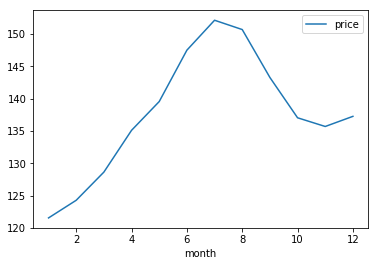

In [76]:
sns.lineplot(data=pd.pivot_table(data=data[data['year'] == 2016],index='month',values='price',aggfunc='mean'))

#### Analyzing the data

#### Conclusion 1: 
In general, the average price of accomodation in Seattle is lowest in January, and is highest in July

#### Data visualization

Have a look at price changes within each month.

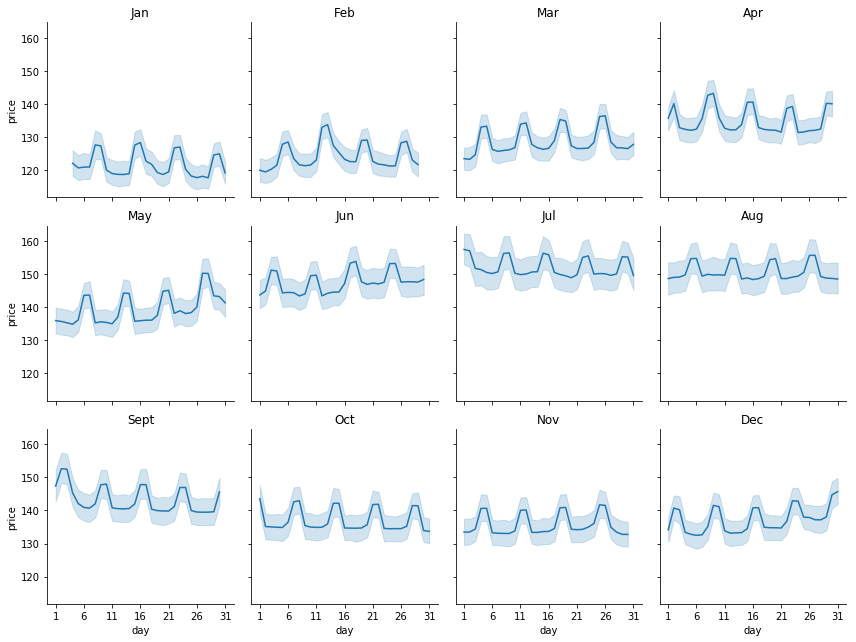

In [83]:
g = sns.FacetGrid(data[data['year'] == 2016], col="month", col_wrap=4)
g.map(sns.lineplot, 'day', 'price')
g.set(xticks=range(1, 32, 5))
axes = g.axes.flatten()
months = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
i = 1
for ax in axes:
    ax.set_title(months[i])
    i += 1

#### Analyzing the data

#### Conclusion 2:
The price of each month fluctuates in a certain range, and almost every month the price increases four times, which means the price always increases at specific days of the week and back to normal level on rest days.

#### Data visualization

Have a look at price on each day in a week

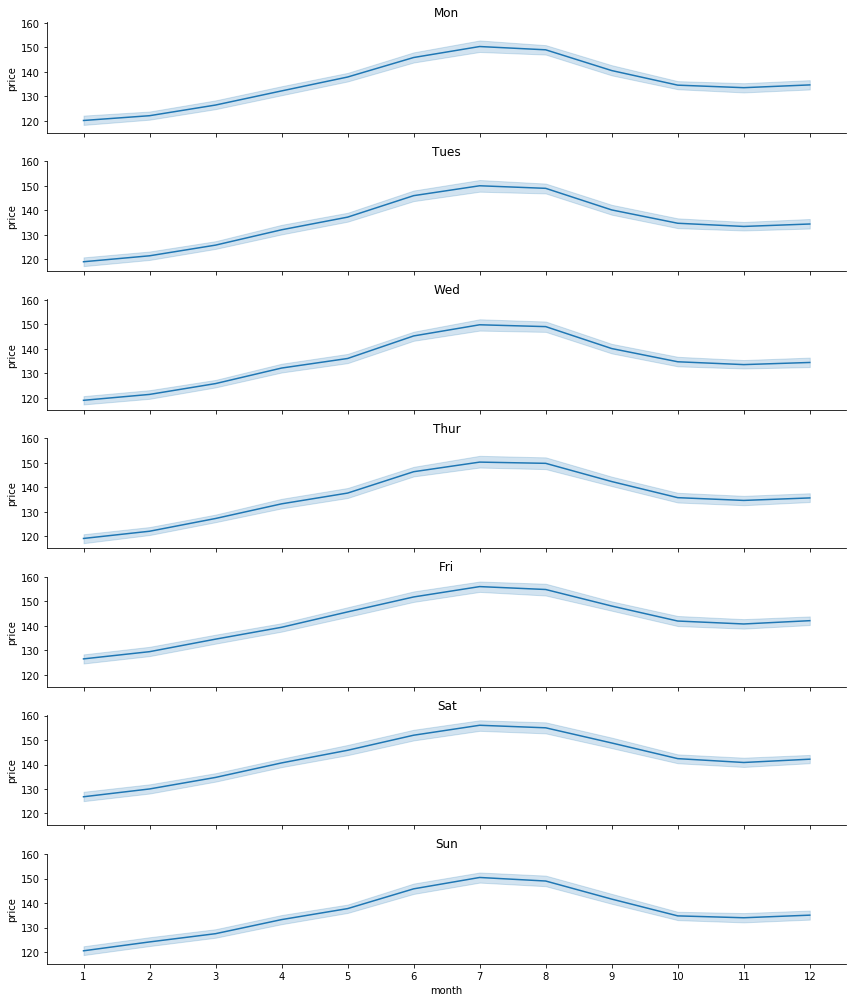

In [84]:
g = sns.FacetGrid(data[data['year'] == 2016], row="day_of_week", height=2, aspect=6)
g.map(sns.lineplot, 'month', 'price')
g.set(xticks=range(1, 13))
axes = g.axes.flatten()
days = {1:'Mon', 2:'Tues', 3:'Wed', 4:'Thur', 5:'Fri', 6:'Sat', 7:'Sun'}
i = 1
for ax in axes:
    ax.set_title(days[i])
    i += 1

#### Analyzing the data

#### Conclusion 3:
In a week, the average price is highest on friday and saturday, on the rest days the price is almost the same. 